# 1. 배열

vector(벡터) -> matrix(행렬) -> array(배열)

주의사항
1. tensorflow에서는 입력 shape로 3차원으로 고정을 시켜놓았다.
1. 사실 조금 더 깊게 들어가보면 a 채널인 4차원 이미지가 있다.  
2. 여러 장의 RGB 이미지가 들어가면 4차원이다.
3. 여러 장의 grayscale 이미지가 들어가면 3차원이다.

In [1]:
import numpy as np

In [15]:
# 1차원
dimension_one = np.array([1,2,3,4])
print(f"1차원 배열 shape : {dimension_one.shape}") 

# 2차원
dimension_two =  \
np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])
print(f"2차원 배열 shape : {dimension_two.shape}") 

# 3차원
dimension_three = \
np.array([
    [
        [1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 10, 11, 12]
    ],
    [
        [13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]
    ]
])
print(f"3차원 배열 shape : {dimension_three.shape}")
print("3차원 shape의 의미는 3행 4열의 배열이 2개가 있다.")

1차원 배열 shape : (4,)
2차원 배열 shape : (3, 4)
3차원 배열 shape : (2, 3, 4)
3차원 shape의 의미는 2행 4열의 배열이 2개가 있다.


# 2. 실습 예제

## Keras mnist dataset을 다운로드
 - 5만개의 학습용, 1만개의 테스트용 **grayscale** image array를 다운로드

In [3]:
from tensorflow.keras.datasets import fashion_mnist

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# image size는 28 x 28의 gray scale 2차원 데이터
print("train data shape: ", train_images.shape, train_labels.shape)  # 6만개, 28 x 28
print("test data shape: ", test_images.shape, test_labels.shape)   # 1만개, 28 x 28

4431872/4422102 [==============================] - 0s 0us/step
train data shape:  (60000, 28, 28) (60000,)
test data shape:  (10000, 28, 28) (10000,)


## MNIST image array 시각화

Text(0.5, 1.0, 'label : 9')

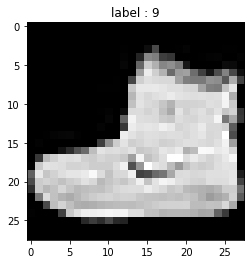

In [20]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap='gray')  # cmap 를 안할 경우, 자체 색을 입혀버린다.
plt.title(f"label : {train_labels[0]}")

In [25]:
train_images[0, : , :], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

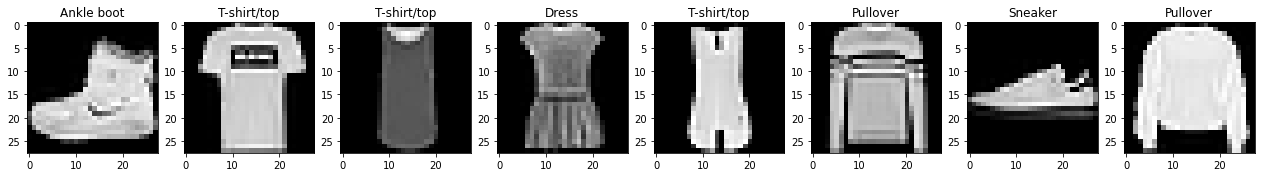

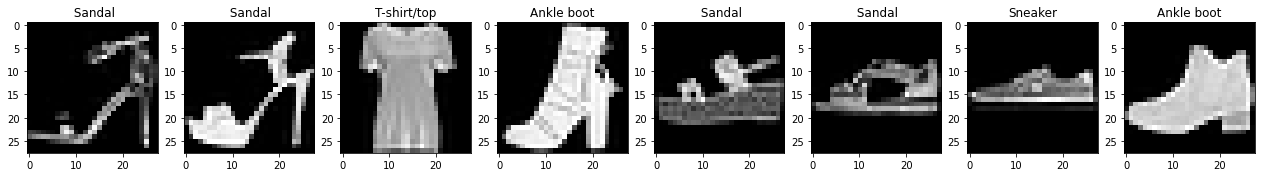

In [31]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", " Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

def show_images(images, labels, ncols = 8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)  # 1행 8열 도화지가 생성된다.
    for i in range(ncols):  # 각 열 하나씩 출력하고 이미지를 넣는 작업
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])

show_images(train_images[:8], train_labels[:8], 8)
show_images(train_images[8:16], train_labels[8:16], 8)

## 데이터 전처리 수행
  - 0 ~ 255 사이의 픽셀 값을 0 ~ 1 사이 값으로 변환
  - array type은 float 32

In [34]:
def get_preprocessed_data(images, labels):

    # 학습과 테스트 이미지 array를 0 ~ 1 사이 값으로 scale 및 float 32 변형.
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)

    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [ ]:
train_images[0]  # 확인

## Dense Layer를 기반으로 모델을 생성
  - 지금은 Sequential을 사용하지만, 가급적 지양한다.
  - Dense layer는 1차원적인 입력 밖에 못 받아들인다.
  - 28 x 28 = 784개, 784개의 feature, 모두 node로 받아들여진다.
  - activation = None을 사용할 수 있다.

In [38]:
INPUT_SIZE = 28

In [40]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model =  Sequential([
    Flatten(input_shape = (INPUT_SIZE, INPUT_SIZE)),  # 2차원 배열을 1차원 배열로 바꿔준다.
    Dense(100, activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(10, activation = "softmax")   # softmax는 다중분류 시 사용
])

"""
1. input으로 784개가 들어간다.
2. Node가 100개 있으므로 784 * 100 = 78400 개의 파라미터를 가진다.
3. 여기에 Node 한 개당 bias 한 개를 가지기 때문에 78400 + 100 = 785000
None은 batch가 들어가게 된다.
"""

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


모델의 Loss 와 Optimizer 설정하고 학습 수행
  - OHE(One Hot Encoding) - categorical crossentropy
  - 아닌 경우, sparse categorical crossentropy

In [41]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
from tensorflow.keras.utils import to_categorical
"""
원래 1차원이었지만, one hot encoding으로 2차원으로 변경
"""
train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [43]:
train_oh_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [45]:
train_images.shape, train_oh_labels.shape

((60000, 28, 28), (60000, 10))

In [46]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9384 - accuracy: 0.6674
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5988 - accuracy: 0.7796
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5376 - accuracy: 0.8080
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4990 - accuracy: 0.8238
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4728 - accuracy: 0.8313
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4536 - accuracy: 0.8382
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4362 - accuracy: 0.8440
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4228 - accuracy: 0.8479
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4118 - accuracy: 0.8512
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.402

In [47]:
# 그래프로도 표현할 수 있다.
print(history.history['loss'])
print(history.history['accuracy'])

[0.9383525252342224, 0.5988041758537292, 0.5376110076904297, 0.4989582300186157, 0.4727560579776764, 0.45355474948883057, 0.43615537881851196, 0.4228440523147583, 0.411842405796051, 0.4025830030441284, 0.39439478516578674, 0.38788214325904846, 0.3805452585220337, 0.37445971369743347, 0.3683813810348511, 0.36197230219841003, 0.3572653830051422, 0.35240066051483154, 0.34641459584236145, 0.3418673574924469]
[0.6674000024795532, 0.7795666456222534, 0.8080000281333923, 0.8237666487693787, 0.831250011920929, 0.8381500244140625, 0.8439666628837585, 0.8478666543960571, 0.8511999845504761, 0.8547999858856201, 0.8595333099365234, 0.8597999811172485, 0.8622166514396667, 0.8640999794006348, 0.8666666746139526, 0.8687833547592163, 0.8712999820709229, 0.8730000257492065, 0.8746833205223083, 0.87663334608078]


## 테스트 데이터를 기반으로 Label 값 예측
  - model.predict()를 이용하여 label값 예측
  - predict()의 인자로 입력되는 feature array는 학습의 feature array와 shape가 동일해야한다.
  - fit()시 3차원 array를 입력했으면 predict도 돌일한 3차원 데이터 입력
  - 한건만 predict()할 대도 3차원 데이터, 이를 위해 expand_dims()로 2차원 image 배열을 3차원으로 변경

In [48]:
test_images.shape

(10000, 28, 28)

In [49]:
pred_proba = model.predict(test_images)
print(pred_proba.shape)

(10000, 10)


In [67]:
pred_proba[0] # 총 10개의 labels 중 확률로 돌려준다.

array([4.41322321e-08, 1.24878596e-07, 7.18441342e-08, 8.35175251e-06,
       1.90847527e-06, 9.18632224e-02, 6.56497514e-06, 1.16725326e-01,
       2.51871580e-03, 7.88875639e-01], dtype=float32)

In [51]:
test_images[0].shape

(28, 28)

In [66]:
print(np.expand_dims(test_images[0], axis = 0).shape)
print(np.expand_dims(test_images[0], axis = 1).shape)
print(np.expand_dims(test_images[0], axis = 2).shape)

(1, 28, 28)
(28, 1, 28)
(28, 28, 1)


In [57]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print("softmax output", pred_proba)

softmax output [[4.41322321e-08 1.24878596e-07 7.18441342e-08 8.35175251e-06
  1.90847527e-06 9.18632224e-02 6.56497514e-06 1.16725326e-01
  2.51871580e-03 7.88875639e-01]]


In [63]:
# np.argmax는 값 중에서 가장 큰 값의 인덱스 번호를 return 해 준다.
# np.squeeze는 사이즈 중 1을 제거해준다.

print("pred_proba.shape : ", pred_proba.shape) # 1행 10열 -> 2차원
print("np.squeeze(pred_proba).shape :", np.squeeze(pred_proba).shape, "\n") # 10개 ->1차원

pred = np.argmax(np.squeeze(pred_proba))
print("predicted class value:", pred )

pred_proba.shape :  (1, 10)
np.squeeze(pred_proba).shape : (10,) 

predicted class value: 9


## 테스트 데이터 세트로 모델 성능 검증


In [73]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8599


[0.39119699597358704, 0.8598999977111816]

## 검증 데이터 세트를 이용하여 학습 수행
 - 일반적으로 fit() 수행시 별도의 검증 데이터 세트를 이용하여 학습 시 과적합(Overfitting)이 발생하는지 모니터링
 - fit()을 수행하면 iteration을 반복하기 때문에 중간에 하이퍼파라미터 변경(예:Learning Rate)등의 작업이 어렵다.
 - fit() iteration시 여러 작업을 하기 위해 Callback 객체를 가짐.
 이탤릭체 텍스트- 검증 데이터 세트를 fit()시 적용하여 과적합이나 더 이상 검증 데이터 성능이 좋아지지 않을 때 Callback을 사용하여 Learnig Rate 보정 작업 등을 수행 기능

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def get_preprocessed_data(images, labels):

    # 학습과 테스트 이미지 array를 0 ~ 1 사이 값으로 scale 및 float 32 변형.
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)

    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 기존 학습 데이터를 다시 학습과 검증 데이터 세트로 분리

# 데이터의 15%를 test dataset으로 분리
# random_state는 데이터를 random하게 나누기 때문에 다음번에도 같은 값으로 나눠주기 위해
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2021)
print("train과 validation shape:", tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape)

# OHE 적용
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

print("after OHE:", tr_oh_labels.shape, val_oh_labels.shape)

train과 validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)
after OHE: (51000, 10) (9000, 10)


## 검증 데이터 세트를 적용하여 학습 수행

In [6]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),loss = 'categorical_crossentropy', metrics=['accuracy'])

In [7]:
# validation_split을 사용하여 나눌 수도 있다.
history = model.fit(x=tr_images,y=tr_oh_labels, validation_data=(val_images, val_oh_labels), batch_size=12, epochs=20, verbose=1)

Epoch 1/20
4250/4250 [==============================] - 15s 3ms/step - loss: 0.5055 - accuracy: 0.8208 - val_loss: 0.4181 - val_accuracy: 0.8468
Epoch 2/20
4250/4250 [==============================] - 12s 3ms/step - loss: 0.3795 - accuracy: 0.8624 - val_loss: 0.3822 - val_accuracy: 0.8597
Epoch 3/20
4250/4250 [==============================] - 12s 3ms/step - loss: 0.3449 - accuracy: 0.8730 - val_loss: 0.3657 - val_accuracy: 0.8651
Epoch 4/20
4250/4250 [==============================] - 12s 3ms/step - loss: 0.3215 - accuracy: 0.8806 - val_loss: 0.3602 - val_accuracy: 0.8701
Epoch 5/20
4250/4250 [==============================] - 12s 3ms/step - loss: 0.3053 - accuracy: 0.8865 - val_loss: 0.4170 - val_accuracy: 0.8487
Epoch 6/20
4250/4250 [==============================] - 12s 3ms/step - loss: 0.2909 - accuracy: 0.8911 - val_loss: 0.3328 - val_accuracy: 0.8797
Epoch 7/20
4250/4250 [==============================] - 12s 3ms/step - loss: 0.2792 - accuracy: 0.8970 - val_loss: 0.3266 - val_ac

In [11]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[0.5054827928543091, 0.37949955463409424, 0.34491080045700073, 0.3214852511882782, 0.3053445816040039, 0.2909412086009979, 0.2792039215564728, 0.2686263918876648, 0.2597541809082031, 0.25217369198799133, 0.24360719323158264, 0.23783017694950104, 0.23089167475700378, 0.22606797516345978, 0.21939131617546082, 0.21414178609848022, 0.20867310464382172, 0.20557408034801483, 0.20094607770442963, 0.19604867696762085]
[0.8208039402961731, 0.8624313473701477, 0.8730196356773376, 0.8805686235427856, 0.8865489959716797, 0.8911176323890686, 0.8970392346382141, 0.8993529677391052, 0.9021568894386292, 0.9047254920005798, 0.907392144203186, 0.9109804034233093, 0.9125097990036011, 0.9141372442245483, 0.9168235063552856, 0.9188235402107239, 0.9199607968330383, 0.9212548732757568, 0.9230980277061462, 0.9253921508789062]
[0.418071985244751, 0.3822166919708252, 0.36568382382392883, 0.3601583242416382, 0.41696882247924805, 0.33276963233947754, 0.3266390264034271, 0.3263295888900757, 0.3707166910171509, 0.3

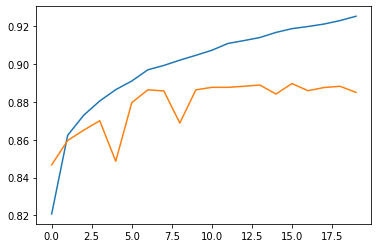

In [18]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.show()

# Functional API
 - Sequential vs Functional API
 - Sequential을 지양한다.




In [24]:
# Sequential Model을 이용하여 Keras 모델 생성
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

INPUT_SIZE=28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model = Sequential()
model.add(Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)))
model.add(Dense(100, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
____________________________

In [22]:
# Functional API
from tensorflow.keras.layers import Input, Flatten,Dense
from tensorflow.keras.models import Model

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
x = Flatten()(input_tensor)
x = Dense(100, activation='relu')(x)
x = Dense(30, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import Layer, Input
from tensorflow.keras.models import Model
import tensorflow as tf
class CustomDense(tf.keras.layers.Layer):
    # CustomDense 객체 생성시 입력되는 초기화 parameter 처리
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units
    
    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer='random_normal',
            trainable=True
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer='random_normal', trainable=True
        )
    
    # CustomDense 객체에 callable로 입력된 입력 데이터 처리.
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

# input 값을 4개의 원소를 가지는 1차원으로 생성.
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력.
outputs = CustomDense(10)(inputs)

# inputs와 outputs로 model 생성.
model = Model(inputs, outputs)
model.summary()

# Lie conding

In [2]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(100, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)

    return model

model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# 0 ~ 1 사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)

    return images, labels

# 0 ~ 1 사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    oh_labels = to_categorical(labels)

    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):

    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)

    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels)

In [20]:
from tensorflow.keras.datasets import fashion_mnist
# Fashion MNIST 데이터 재로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
            get_train_valid_test_set(train_images, train_labels, test_images, test_labels)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_oh_labels.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000, 10)


In [22]:
from tensorflow.keras.optimizers import Adam

# Model 생성 및 optimizer, loss, metrics 적용
model = create_model()
model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x=tr_images, y=tr_oh_labels, validation_data=(val_images, val_oh_labels), batch_size=32, epochs=20)

Epoch 1/20
1594/1594 [==============================] - 8s 3ms/step - loss: 0.5212 - accuracy: 0.8192 - val_loss: 0.4212 - val_accuracy: 0.8440
Epoch 2/20
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3873 - accuracy: 0.8605 - val_loss: 0.3726 - val_accuracy: 0.8680
Epoch 3/20
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3495 - accuracy: 0.8725 - val_loss: 0.3672 - val_accuracy: 0.8646
Epoch 4/20
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3222 - accuracy: 0.8825 - val_loss: 0.3649 - val_accuracy: 0.8650
Epoch 5/20
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3081 - accuracy: 0.8873 - val_loss: 0.3447 - val_accuracy: 0.8760
Epoch 6/20
1594/1594 [==============================] - 4s 3ms/step - loss: 0.2926 - accuracy: 0.8908 - val_loss: 0.3269 - val_accuracy: 0.8814
Epoch 7/20
1594/1594 [==============================] - 4s 3ms/step - loss: 0.2811 - accuracy: 0.8950 - val_loss: 0.3344 - val_accuracy:

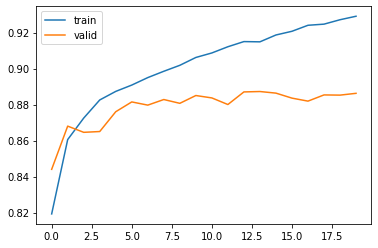

In [26]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['accuracy'],  label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    plt.show()

show_history(history)

In [27]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_labels, batch_size=128, verbose=1)

79/79 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8780


[0.37312039732933044, 0.878000020980835]

# Callback
 - 학습 과정 중 동적으로 조정할 수 있다.
 - iteration 중 특정 이벤트 발생 시마다 등록된 callback이 호출되어 수행.
 - 주로 최적의 Learning rate를 Control하는데 사용

ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weight_only=False, mode='auto', period=1)

 - monitor: 모니터할 지표(loss 또는 평가지표)
 - save_weights_only: weights만 저장할지 여부
 - mode:{auto, min, max} 중 하나, monitor 지표가 감소해야 좋은 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 자동으로 유추.

In [29]:
import os
os.getcwd()

'/content'

In [56]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

model = create_model()
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='/content/weights.{epoch:03d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True, save_weights_only=True, mode='min', save_freq=3, verbose=1)

history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=10, validation_data=(val_images, val_oh_labels), callbacks=[mcp_cb])

Epoch 1/10
  1/399 [..............................] - ETA: 1:54 - loss: 2.3648 - accuracy: 0.0703

KeyError: ignored

In [57]:
!rm -rf weights*